# Author: Kshitij Singh
# Project Task 1: Prediction using Supervised ML

<font size = 3>The task is to predict percentage of students based on the number of hours they study per day using Simple Linear Regression as the data contains two variables.</font>  

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the DataSet

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Analysing the Data

In [4]:
df.shape

(25, 2)

It is verified that the dataset contains two variables.
1. Independent Variable: Hours (This contains the number of hours a student studies per day)
2. Dependent Variable: Scores (This is the percentage scored by students)  

The dataset contains 25 training examples.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Main conclusions that can be drawn from the table above:
- The average a student studies for is 5.01 hours/day and average percentage scored by students is 51.48%.
- The minimum study time which is given by a student is 1.1 hours/day and minimum scores obtained by student is 17%
- The maximum hours studied by a student per day is 9.2 and maximum percentage obatined is 95%.

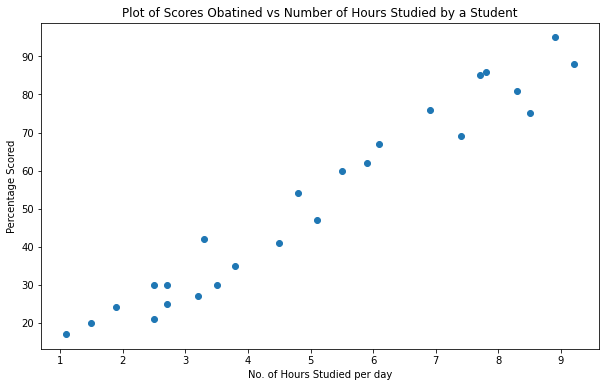

In [6]:
plt.figure(figsize = (10,6))

plt.scatter(df['Hours'], df['Scores'])

plt.title("Plot of Scores Obatined vs Number of Hours Studied by a Student")
plt.xlabel('No. of Hours Studied per day')
plt.ylabel("Percentage Scored")

plt.show()

By looking at the plot it is clearly visible that the relationship between Percentage scored by a student is directly proportional to the Number of hours they study, i.e., it is linear.  
Let's go forward with preparing the data set for training the model.

## Preparing the Dataset for Model Training

In [7]:
#Dividing the dataset into independent variable X and dependent variable y
X = df.iloc[:,[0]].values
y = df.iloc[:,[1]].values

In [8]:
#Dividing the Data into Training and Test Set
#Here we keep the test data size to be 1/5th of whole data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

## Training the model

In [9]:
#Importing the LinearRegression Class
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fitting the model onto our training data
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#Getting the parameters of our model
a = model.intercept_
b = model.coef_[0]

print(a)
print(b)

[2.01816004]
[9.91065648]


Using the parameters, i.e., coefficients and intercept, we can get predicted y(percentage scored by students).  
These y will form a line as they will follow the equation of line:  
y = mX + C, where m = coefficient and C = intercept  
I'll use this concept in plotting the regression line of training data.

The shorter and easier alternative to get predicted y is by using predict method of the Linear Regression Class. I'll use that in test data.

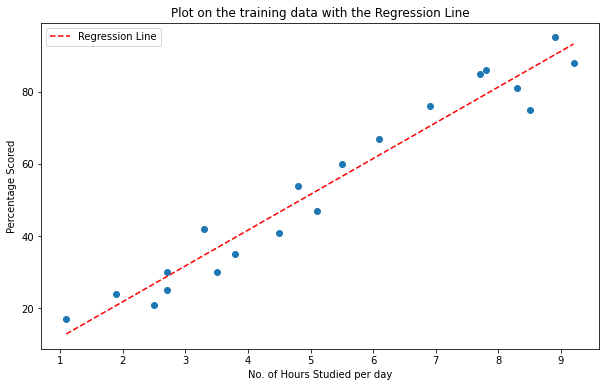

In [11]:
#Sorting X so that there is no overlapping of line using plt.plot function
X1 = sorted(X_train) 
y_pred_train = b*X1 + a

plt.figure(figsize = (10,6))

plt.scatter(X_train, y_train)
plt.plot(X1, y_pred_train,'r--')

plt.legend(["Regression Line"])
plt.title("Plot on the training data with the Regression Line")
plt.xlabel('No. of Hours Studied per day')
plt.ylabel("Percentage Scored")

plt.show()

## Predictions on Test Data

In [12]:
#let's see and compare the actual values and the predicted values in the testing data.
y_pred_test = model.predict(X_test)
Col = ['Hours Studies', 'Actual Scores', 'Predicted Scores']

pd.DataFrame(np.hstack((X_test, y_test, np.around(y_pred_test, 2))), columns = Col)

,Hours Studies,Actual Scores,Predicted Scores
0,1.5,20.0,16.88
1,3.2,27.0,33.73
2,7.4,69.0,75.36
3,2.5,30.0,26.79
4,5.9,62.0,60.49


It can be seen that the difference between the predicted values and the actual value is low.

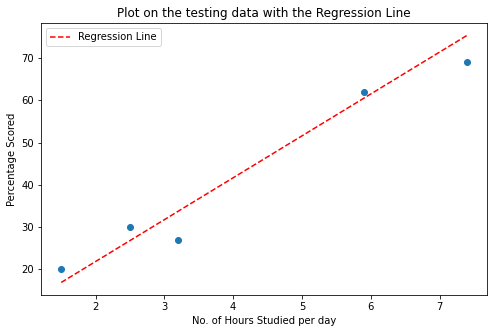

In [13]:
#Plotting the regression line on the test data.
p = sorted(X_test)
q = model.predict(p)

plt.figure(figsize = (8,5))

plt.plot(p, q, 'r--')
plt.scatter(X_test, y_test)

plt.legend(["Regression Line"])
plt.title("Plot on the testing data with the Regression Line")
plt.xlabel('No. of Hours Studied per day')
plt.ylabel("Percentage Scored")

plt.show()

From the plot above, we can conclude the predicted values are really close to the actual values.

## Error Evaluation
To check how well a model performs on the data we check the mean absolute error between the predicted and the actual values.

In [14]:
from sklearn.metrics import mean_absolute_error

print("The mean absolute error between predicted and actual values in:")
print("1. Training set is ",mean_absolute_error(y_train, model.predict(X_train)))
print("2. Test set is ",mean_absolute_error(y_test, model.predict(X_test)))

The mean absolute error between predicted and actual values in:
1. Training set is  5.186601709180368
2. Test set is  4.183859899002975


## Prediciting a Score based on Given Hours
The task is to predict a score given that a student has studies 9.25 hours/day.

In [15]:
x = [[9.25]]
y = np.around(model.predict(x),2) #rounding off the result

print('Percentage scored by student who studies {one} hours/day is {two}%'.format(one = x[0][0], two = y[0][0]))

Percentage scored by student who studies 9.25 hours/day is 93.69%
